In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), '..')))

In [4]:
from pricer.analytical import BlackScholesCall
import numpy as np

s = np.array([[100, 100], [100, 100]])
k = np.array([[100, 100], [100, 100]])
t = np.array([[1, 0.75], [0.5, 0.25]])
r = np.array([[0.05, 0.05], [0.05, 0.05]])
v = np.array([[0.2, 0.2], [0.2, 0.2]])
BlackScholesCall(underlier_price=s, strike=k, 
                 expiry=t, interest_rate=r, volatility=v).price()

array([[10.45058357,  8.77226826],
       [ 6.88872858,  4.61499713]])

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from pricer.pde_solver import CrankNicolsonPDESolver
from pricer.analytical import (
    BarrierDownAndOutCall,
    BarrierUpAndOutCall,
    BarrierDownAndInCall,
    BarrierUpAndInCall,
)

In [3]:
import warnings
warnings.filterwarnings("ignore") # ignore divide by 0 and log(0) warnings on the boundary of the grid

In [4]:
barrier_type_cls = {
    "down-and-out": BarrierDownAndOutCall,
    "up-and-out": BarrierUpAndOutCall,
    "down-and-in": BarrierDownAndInCall,
    "up-and-in": BarrierUpAndInCall,
}

In [5]:
run_config = {
        "t": np.linspace(0, 1, 100 + 1),
        "x": np.linspace(0, 200, 1000 + 1),
        "strike": 40,
        "r": 0.06,
        "sigma": 0.2,
        "call_fl": "put"
}

american_solver = CrankNicolsonPDESolver({**run_config, "american": True})
american_solver.solve()

american_solver.price([[36, 1]])

100%|██████████| 100/100 [00:00<00:00, 183.49it/s]


array([4.48216936])

100%|██████████| 100/100 [00:00<00:00, 1296.30it/s]


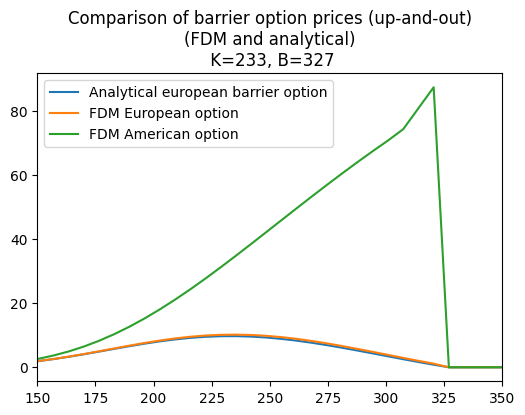

In [10]:
for barrier_type in [
    # "down-and-out", 
    "up-and-out", 
    # "down-and-in", 
    # "up-and-in"
    ]:
    K = 233
    B = 327
    # run_config = {
    #     "t": np.linspace(0, 1, 400 + 1),
    #     "x": np.linspace(0, B * 2, 200 + 1),
    #     "strike": K,
    #     "r": 0.15,
    #     "sigma": 0.1,
    #     "barrier": B,
    #     "barrier_type": barrier_type,
    # }
    # solver_theor = CrankNicolsonPDESolver(run_config)
    # solver_theor.solve()

    t = 0.8
    run_config = {
        "t": np.linspace(0, t, 100 + 1),
        "x": np.linspace(0, B * 2, 100 + 1),
        "strike": K,
        "r": 0.15,
        "sigma": 0.3,
        "barrier": B,
        "barrier_type": barrier_type,
    }
    solver = CrankNicolsonPDESolver(run_config)
    solver.solve()

    american_solver = CrankNicolsonPDESolver({**run_config, "american": True})
    american_solver.solve()

    anayltical_price = barrier_type_cls[barrier_type](
        run_config["x"],
        run_config["strike"],
        t,
        run_config["r"],
        run_config["sigma"],
        run_config["barrier"],
    ).price()

    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(
        run_config["x"], anayltical_price, label="Analytical european barrier option"
    )
    ax.plot(run_config["x"], solver.grid[:, 0], label="FDM European option")
    ax.plot(run_config["x"], american_solver.grid[:, 0], label="FDM American option")
    # ax.plot(
    #     run_config["x"], solver_theor.grid[:, 100 - 74], label="In my head", lw=1
    # )
    ax.legend()
    ax.set_title(
        f"Comparison of barrier option prices ({barrier_type})\n(FDM and analytical)\n K={K}, B={B}"
    )
    ax.set_xlim(150, 350)
    plt.show()

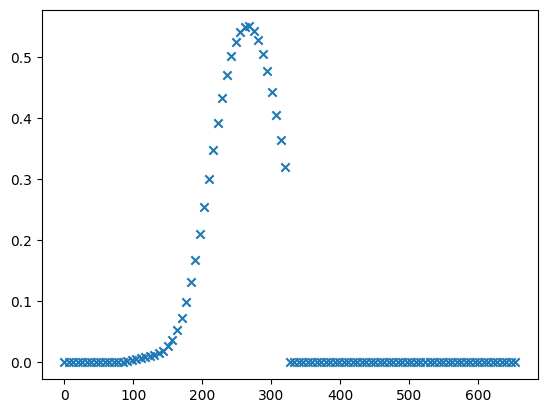

In [11]:
plt.scatter(solver.x[:, 0], solver.grid[:,0] - anayltical_price, marker="x")
plt.show()

In [19]:
import timeit

cls = CrankNicolsonPDESolver(run_config)
def f():
    cls.price(x, t)

execution_time = timeit.timeit(f, number=1)
print(f"Execution time: {execution_time} seconds")

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:01<00:00, 67.45it/s]


Execution time: 2.945797899970785 seconds
